# Testing Linear Regression Assumptions

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
import statsmodels.graphics.tsaplots as tsa

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preprocessing

In [ ]:
wines = pd.read_csv('winemag.csv').dropna().reset_index(drop=True).drop(
    ['taster_photo', 'description', 'title', 'designation', 'taster_name',], 
    axis=1
)
wines = wines.dropna()
wines = wines[wines.vintage != 'NV']
wines['vintage'] = wines['vintage'].astype('int')

# removing outliers for quantitative data
# price
highest = wines['price'].mean() + 3*wines['price'].std()
lowest = wines['price'].mean() - 3*wines['price'].std()
wines = wines[(wines['price'] < highest) & (wines['price'] > lowest)]

print(wines.dtypes)
wines

country                   object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_twitter_handle     object
variety                   object
vintage                    int64
winery                    object
dtype: object


,country,points,price,province,region_1,region_2,taster_twitter_handle,variety,vintage,winery
0,US,86,12.0,California,Sierra Foothills,Sierra Foothills,@gordone_cellars,Port,2014,Casto Oaks
1,US,86,15.0,Washington,Columbia Valley (WA),Columbia Valley,@wawinereport,Chardonnay,2015,Board Track Racer
2,US,88,40.0,California,Napa Valley,Napa,@vboone,Bordeaux-style Red Blend,2014,Girard
3,US,88,46.0,California,Sta. Rita Hills,Central Coast,@mattkettmann,Pinot Noir,2012,Montemar Wines
4,US,88,13.0,California,California,California Other,@gordone_cellars,Cabernet Sauvignon,2015,Nine North Wine Company
...,...,...,...,...,...,...,...,...,...,...
22001,US,95,62.0,California,Green Valley,Sonoma,@vboone,Pinot Noir,2017,Dutton-Goldfield
22002,US,94,52.0,California,California,California Other,@mattkettmann,Red Blends,2017,Herman Story
22003,US,94,42.0,California,Santa Lucia Highlands,Central Coast,@mattkettmann,Pinot Noir,2017,Stephen Ross
22004,US,94,52.0,California,Paso Robles,Central Coast,@mattkettmann,Red Blends,2017,Herman Story


In [ ]:
wineries = wines.groupby(by=['winery'], as_index=False).count().sort_values(by=['points'])
w = (wineries[wineries['points'] >= 30]['winery']).array
wines = wines.loc[wines['winery'].isin(w)]
varieties = wines.groupby(by=['variety'], as_index=False).count().sort_values(by=['points'])
v = (varieties[varieties['points'] >= 30]['variety']).array
wines = wines.loc[wines['variety'].isin(v)]
wines_price = wines.groupby(by=['price'], as_index=False).mean()
wines_year = wines.groupby(by=['vintage'], as_index=False).mean()

## Pair Plots

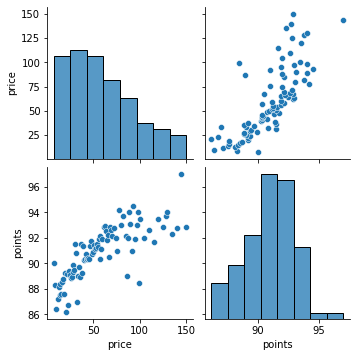

In [ ]:
sns.pairplot(wines_price.loc[:, :'points'])

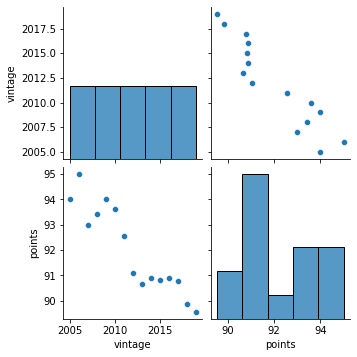

In [ ]:
sns.pairplot(wines_year.loc[:, :'points'])

## Testing Assumptions

### Price

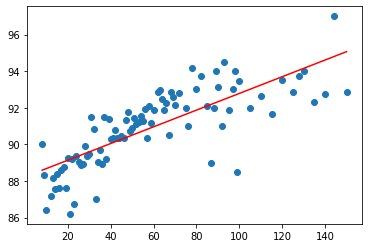

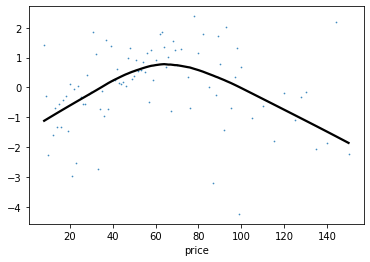

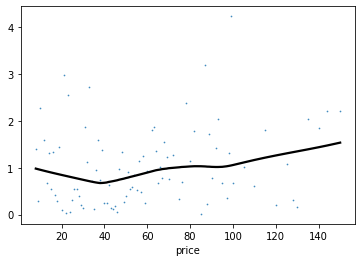

<Figure size 432x288 with 0 Axes>

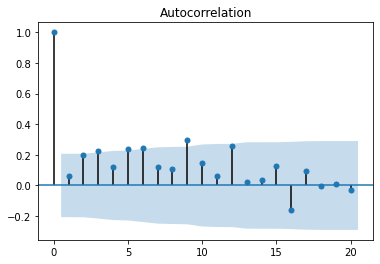

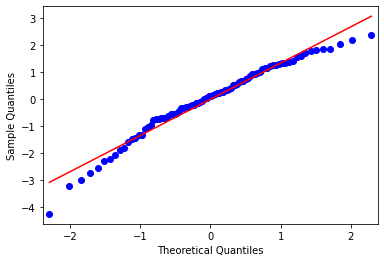

In [ ]:
Y = wines_price['points']
price = wines_price['price']
X = sm.add_constant(price)
model = sm.OLS(Y, X).fit()
Yhat = model.predict(X)
plt.figure(0)
plt.scatter(price, Y)
plt.plot(price, Yhat, linestyle='-', color='red')
plt.figure(1)
sns.regplot(price, model.resid, lowess=True, line_kws = {'color': 'black'}, scatter_kws = {'s' : 0.5})
plt.figure(2)
sns.regplot(price, abs(model.resid), lowess=True, line_kws = {'color': 'black'}, scatter_kws = {'s' : 0.5})
plt.figure(3)
tsa.plot_acf(model.resid)
plt.figure(4)
sm.qqplot(model.resid, line='r');

### Vintage

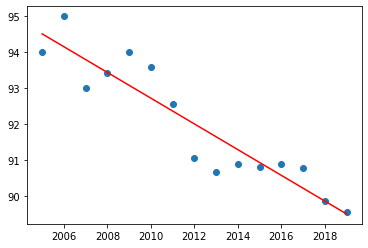

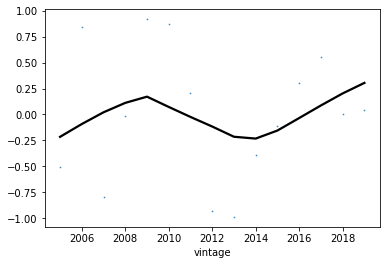

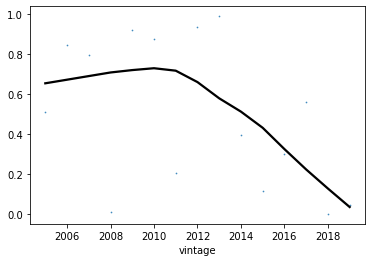

<Figure size 432x288 with 0 Axes>

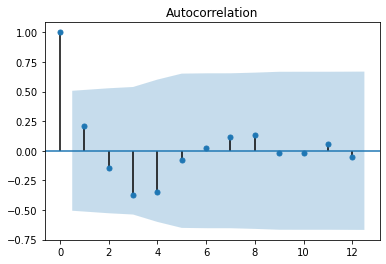

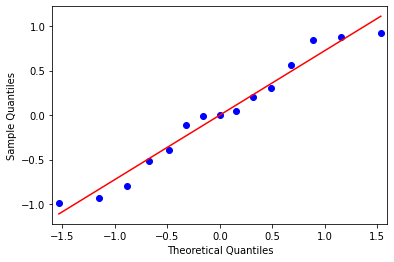

In [ ]:
Y = wines_year['points']
vintage = wines_year['vintage']
X = sm.add_constant(vintage)
model = sm.OLS(Y, X).fit()
Yhat = model.predict(X)
plt.figure(0)
plt.scatter(vintage, Y)
plt.plot(vintage, Yhat, linestyle='-', color='red')
plt.figure(1)
sns.regplot(vintage, model.resid, lowess=True, line_kws = {'color': 'black'}, scatter_kws = {'s' : 0.5})
plt.figure(2)
sns.regplot(vintage, abs(model.resid), lowess=True, line_kws = {'color': 'black'}, scatter_kws = {'s' : 0.5})
plt.figure(3)
tsa.plot_acf(model.resid)
plt.figure(4)
sm.qqplot(model.resid, line='r');

### log of Price

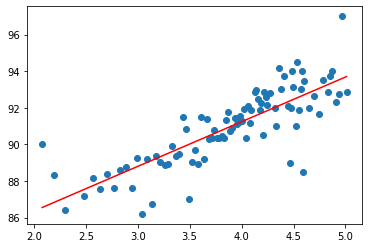

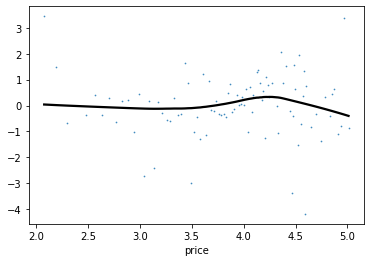

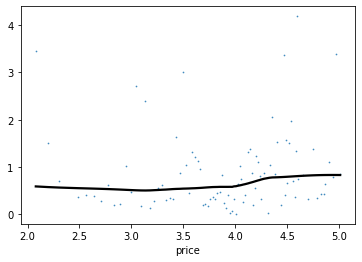

<Figure size 432x288 with 0 Axes>

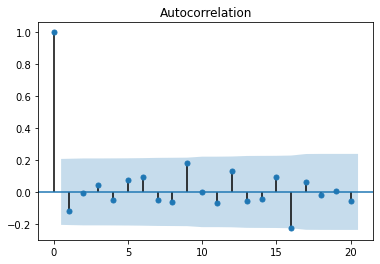

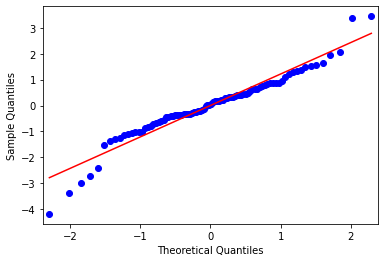

In [ ]:
Y = wines_price['points']
price = np.log(wines_price['price'])
X = sm.add_constant(price)
model = sm.OLS(Y, X).fit()
Yhat = model.predict(X)
plt.figure(0)
plt.scatter(price, Y)
plt.plot(price, Yhat, linestyle='-', color='red')
plt.figure(1)
sns.regplot(price, model.resid, lowess=True, line_kws = {'color': 'black'}, scatter_kws = {'s' : 0.5})
plt.figure(2)
sns.regplot(price, abs(model.resid), lowess=True, line_kws = {'color': 'black'}, scatter_kws = {'s' : 0.5})
plt.figure(3)
tsa.plot_acf(model.resid)
plt.figure(4)
sm.qqplot(model.resid, line='r');